“In this section, we load the data, validate data quality (missing values, duplicates, types), convert dates, remove non-informative identifiers, and prepare time-ordered datasets for EDA and modeling.”

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [2]:
day_df = pd.read_csv("../data/raw/day.csv")
hour_df = pd.read_csv("../data/raw/hour.csv")

In [3]:
print(day_df.shape)

(731, 16)


In [4]:
print(hour_df.shape)

(17379, 17)


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [9]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [10]:
hour_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

## Initial Cleaning

In [11]:
#Convert object type to datetime for date column
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [12]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
day_df.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [14]:
#Drop instant (ID column)
day_df.drop(columns=["instant"], inplace=True)
hour_df.drop(columns=["instant"], inplace=True)

In [15]:
#Missing values?
print(day_df.isna().sum())
print(hour_df.isna().sum())

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [16]:
#duplicates?
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

0
0


In [17]:
# Sort by time
day_df = day_df.sort_values("dteday").reset_index(drop=True)
hour_df = hour_df.sort_values(["dteday", "hr"]).reset_index(drop=True)

In [18]:
#Leakage columns dropping
hour_df.drop(columns=["casual", "registered"], inplace=True)
day_df.drop(columns=["casual", "registered"], inplace=True)

In [19]:
day_df.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed   cnt  
0  0.344167  0.363625  0.805833   0.160446   985  
1  0.363478  0.353739  0.696087   0.248539   801  
2  0.196364  0.189405  0.437273   0.248309  1349  
3  0.200000  0.212122  0.590435   0.160296  1562  
4  0.226957  0.229270  0.436957   0.186900  1600

In [20]:
day_df['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [21]:
day_df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [22]:
day_clean = day_df.copy()
hour_clean = hour_df.copy()

In [23]:
day_clean.to_csv("../data/raw/day_clean.csv", index=False)
hour_clean.to_csv("../data/raw/hour_clean.csv", index=False)

In [24]:
#choosing the columns that we would like to analyze

In [25]:
#Target column
target_col = "cnt"

## EDA

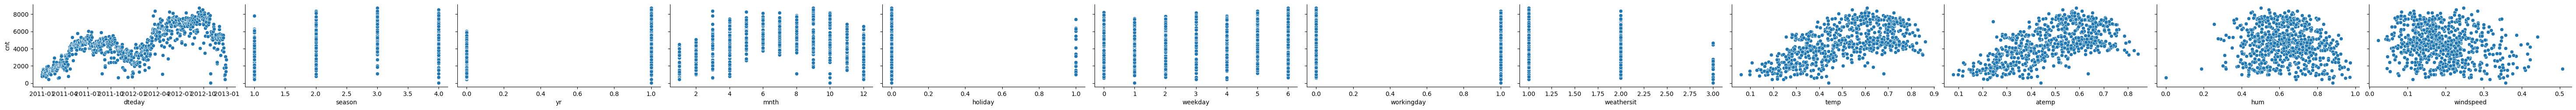

In [26]:
#Loading and preparing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(day_clean, y_vars=['cnt'], x_vars=day_clean.columns[:-1], kind='scatter', aspect= 2)

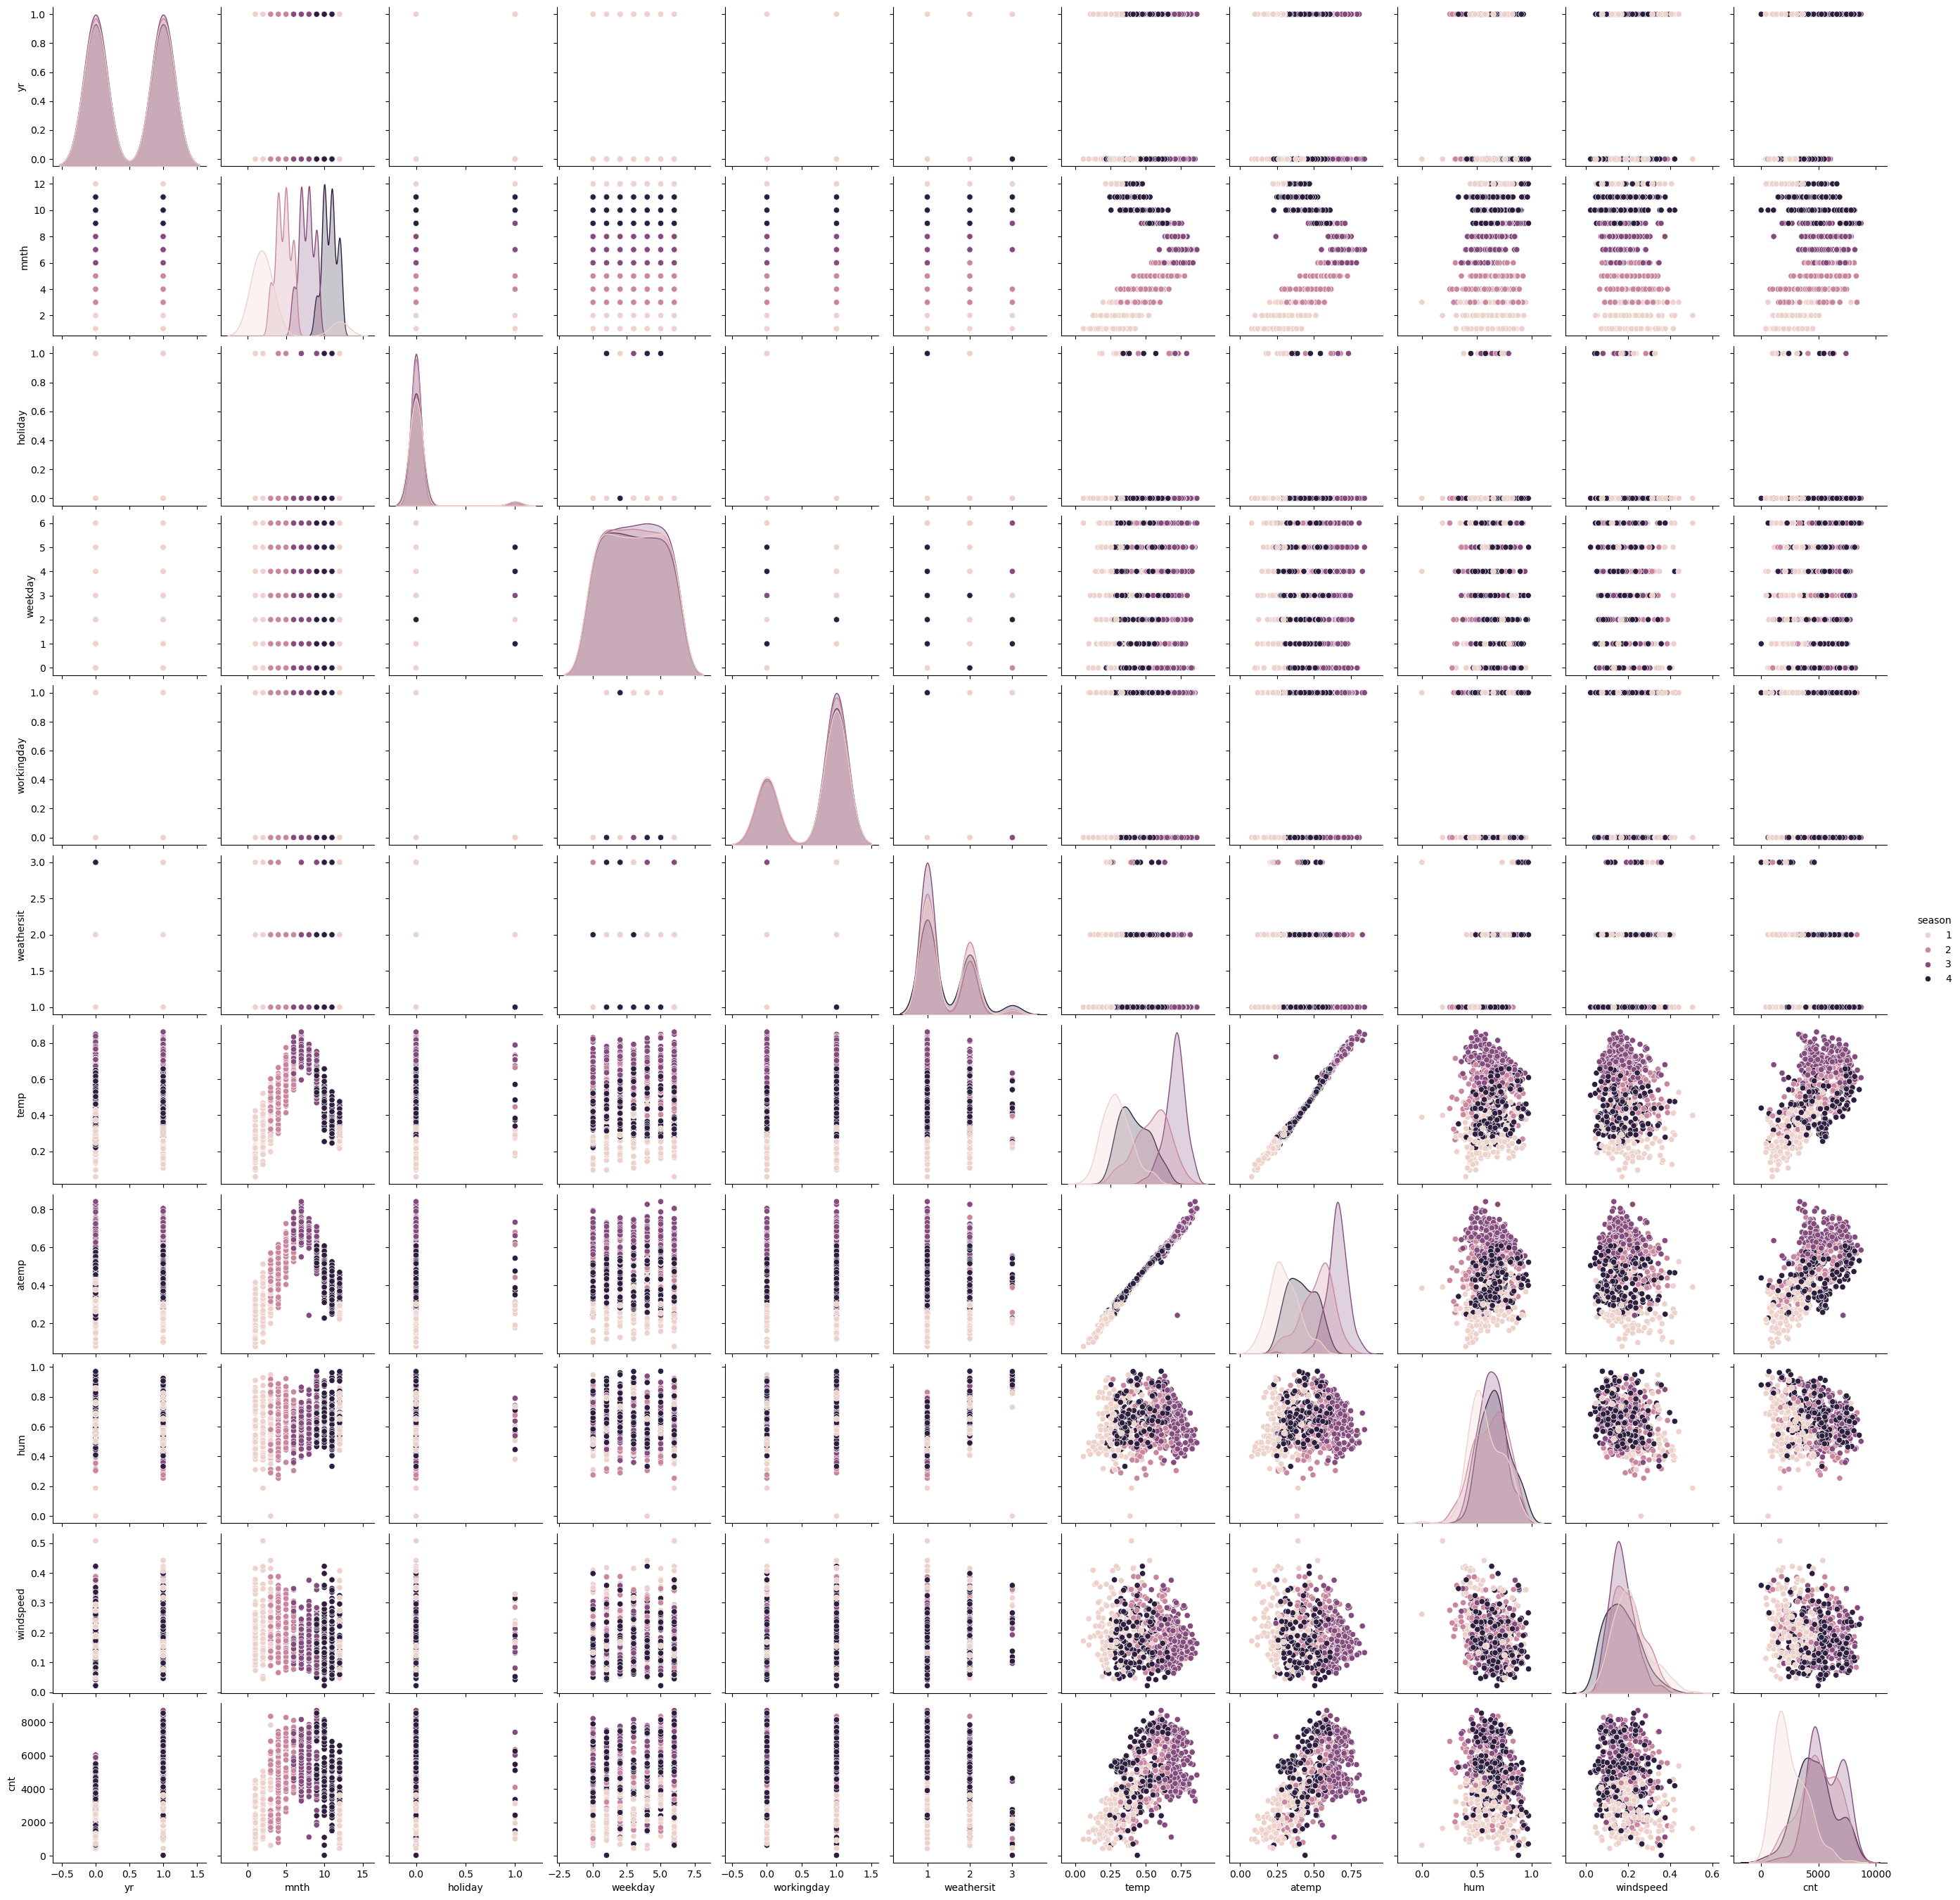

In [27]:
sns.pairplot(day_clean, hue="season")
plt.show()

In [28]:
features = day_clean.drop(columns=["cnt", "dteday", "atemp"])
target = day_clean["cnt"]

In [29]:
day_clean["yr"].value_counts().sort_index()

yr
0    365
1    366
Name: count, dtype: int64

## Train Test Split

In [30]:
#Time-aware train/test split (NO leakage)
split_date = "2012-01-01"

X_train = features[day_clean["dteday"] < split_date]
X_test  = features[day_clean["dteday"] >= split_date]

y_train = target[day_clean["dteday"] < split_date]
y_test  = target[day_clean["dteday"] >= split_date]

In [31]:
#Drop yr
X_train = X_train.drop(columns=["yr"])
X_test = X_test.drop(columns=["yr"])

In [32]:
features[day_clean["dteday"] < split_date].shape

(365, 10)

In [33]:
features[day_clean["dteday"] >= split_date].shape

(366, 10)

## OneHotEncoder

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first') # To avoid having an sparse_matrix as output


In [35]:
X_train.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed'],
      dtype='object')

In [36]:
cat_features = ['season', 'mnth', 'weekday','weathersit']

In [37]:
ohe.fit(X_train[cat_features]) # The .fit() method determines the unique values of each column
X_train_trans_np = ohe.transform(X_train[cat_features])
X_train_trans_np

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(365, 22))

In [38]:
X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=X_train.index)
X_train_trans_df

season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
0         0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
..        ...       ...       ...     ...     ...     ...     ...     ...   
360       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
361       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
362       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
363       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
364       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   

     mnth_7  mnth_8  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0       0.0     0.0  ...      0.0      0.0        0.0        0.0        0.0   
1       0.0     0.0  ...      0.0      0.0        0.0        0.0        0.0   
2       0.0     0.0  ...      0.0      0.0        1.0        0.0        0.0   
3       0.0     0.0  ...      0.0      0.0        0.0        1.0        0.0   
4       0.0     0.0  ...      0.0      0.0        0.0        0.0        1.0   
..      ...     ...  ...      ...      ...        ...        ...        ...   
360     0.0     0.0  ...      0.0      1.0        0.0        1.0        0.0   
361     0.0     0.0  ...      0.0      1.0        0.0        0.0        1.0   
362     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   
363     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   
364     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   

     weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0.0        0.0        1.0           1.0           0.0  
1          0.0        0.0        0.0           1.0           0.0  
2          0.0        0.0        0.0           0.0           0.0  
3          0.0        0.0        0.0           0.0           0.0  
4          0.0        0.0        0.0           0.0           0.0  
..         ...        ...        ...           ...           ...  
360        0.0        0.0        0.0           1.0           0.0  
361        0.0        0.0        0.0           0.0           0.0  
362        1.0        0.0        0.0           0.0           0.0  
363        0.0        1.0        0.0           0.0           0.0  
364        0.0        0.0        1.0           0.0           0.0  

[365 rows x 22 columns]

In [39]:
X_test_trans_np = ohe.transform(X_test[cat_features])
X_test_trans_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(366, 22))

In [40]:
X_test_trans_df = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test_trans_df

season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
365       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
366       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
367       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
368       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
369       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
..        ...       ...       ...     ...     ...     ...     ...     ...   
726       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
727       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
728       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
729       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   
730       0.0       0.0       0.0     0.0     0.0     0.0     0.0     0.0   

     mnth_7  mnth_8  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
365     0.0     0.0  ...      0.0      0.0        0.0        0.0        0.0   
366     0.0     0.0  ...      0.0      0.0        1.0        0.0        0.0   
367     0.0     0.0  ...      0.0      0.0        0.0        1.0        0.0   
368     0.0     0.0  ...      0.0      0.0        0.0        0.0        1.0   
369     0.0     0.0  ...      0.0      0.0        0.0        0.0        0.0   
..      ...     ...  ...      ...      ...        ...        ...        ...   
726     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   
727     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   
728     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   
729     0.0     0.0  ...      0.0      1.0        0.0        0.0        0.0   
730     0.0     0.0  ...      0.0      1.0        1.0        0.0        0.0   

     weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
365        0.0        0.0        0.0           0.0           0.0  
366        0.0        0.0        0.0           0.0           0.0  
367        0.0        0.0        0.0           0.0           0.0  
368        0.0        0.0        0.0           1.0           0.0  
369        1.0        0.0        0.0           0.0           0.0  
..         ...        ...        ...           ...           ...  
726        1.0        0.0        0.0           1.0           0.0  
727        0.0        1.0        0.0           1.0           0.0  
728        0.0        0.0        1.0           1.0           0.0  
729        0.0        0.0        0.0           0.0           0.0  
730        0.0        0.0        0.0           1.0           0.0  

[366 rows x 22 columns]

In [41]:
import pickle

# encoders/
# scalers/
# models/
with open("one_hot_encoder.pkl", "wb") as file:
    pickle.dump(ohe, file)

In [42]:
num_features = ['holiday', 'workingday','temp', 'hum', 'windspeed']

In [43]:
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

In [44]:
X_train_full = pd.concat([X_train_trans_df, X_train_num], axis=1)
X_test_full  = pd.concat([X_test_trans_df, X_test_num], axis=1)

In [45]:
X_train_full.shape

(365, 27)

In [46]:
X_train

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
360       1    12        0        2           1           2  0.325000   
361       1    12        0        3           1           1  0.299130   
362       1    12        0        4           1           1  0.248333   
363       1    12        0        5           1           1  0.311667   
364       1    12        0        6           0           1  0.410000   

          hum  windspeed  
0    0.805833   0.160446  
1    0.696087   0.248539  
2    0.437273   0.248309  
3    0.590435   0.160296  
4    0.436957   0.186900  
..        ...        ...  
360  0.762500   0.188450  
361  0.503913   0.293961  
362  0.574167   0.119412  
363  0.636667   0.134337  
364  0.615833   0.220154  

[365 rows x 9 columns]

# Scaling 
## with OHE

In [47]:
##Scaling data
std_scaler = StandardScaler()

std_scaler.fit(X_train_full)

with open("standard_scaler.pkl", "wb") as file:
    pickle.dump(std_scaler, file)

X_train_full_np = std_scaler.transform(X_train_full)
X_test_full_np  = std_scaler.transform(X_test_full)

X_train_full_scaled_ohe = pd.DataFrame(X_train_full_np, columns=X_train_full.columns, index=X_train_full.index)
X_test_full_scaled_ohe  = pd.DataFrame(X_test_full_np, columns=X_test_full.columns, index=X_test_full.index)

## without OHE

In [48]:
X_train_full_notohe = X_train.copy()
X_test_full_notohe  = X_test.copy()

In [49]:
##Scaling data
std_scaler = StandardScaler()

std_scaler.fit(X_train_full_notohe)

with open("standard_scaler.pkl", "wb") as file:
    pickle.dump(std_scaler, file)

X_train_full_np = std_scaler.transform(X_train_full_notohe)
X_test_full_np  = std_scaler.transform(X_test_full_notohe)

X_train_full_scaled_notohe = pd.DataFrame(X_train_full_np, columns=X_train_full_notohe.columns, index=X_train_full_notohe.index)
X_test_full_scaled_notohe  = pd.DataFrame(X_test_full_np, columns=X_test_full_notohe.columns, index=X_test_full_notohe.index)

# Feature shapes

In [50]:
X_train_full_scaled_notohe.shape

(365, 9)

In [51]:
X_train_full_scaled_ohe.shape

(365, 27)

In [52]:
X_train.shape

(365, 9)

# KNN

In [53]:
from sklearn.neighbors import KNeighborsRegressor

## on raw (unscaled) data

In [54]:
knn = KNeighborsRegressor(n_neighbors=10) # K = 10

In [55]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [56]:
print(f"The R2 of the model is {knn.score(X_test, y_test): .2f}")

The R2 of the model is -0.79


In [57]:
y_pred = knn.predict(X_test)

In [58]:
y_true = y_test.values

In [59]:
result_raw = pd.DataFrame()
result_raw['train cnt'] = y_train
result_raw['pred cnt'] = y_pred[:365]
result_raw['real cnt'] = y_true[:365]
result_raw

train cnt  pred cnt  real cnt
0          985    1365.6      2294
1          801    1211.3      1951
2         1349    1519.0      2236
3         1562    1390.7      2368
4         1600    1511.6      3272
..         ...       ...       ...
360       1162    2193.9       441
361       2302    2402.8      2114
362       2423    2389.6      3095
363       2999    2639.8      1341
364       2485    2463.1      1796

[365 rows x 3 columns]

<Axes: >

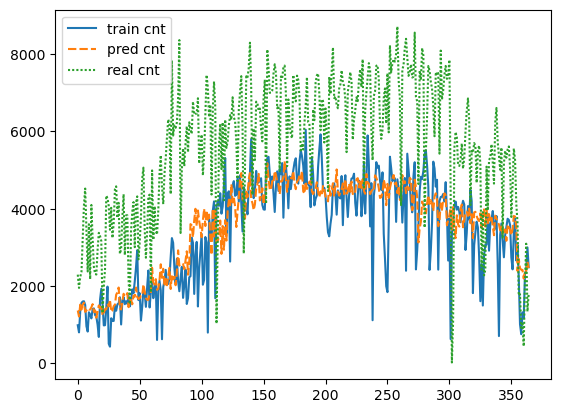

In [60]:
sns.lineplot(result_raw)

In [61]:
# K = 5

In [62]:
knn5 = KNeighborsRegressor(n_neighbors=5)

In [63]:
knn5.fit(X_train, y_train)

KNeighborsRegressor()

In [64]:
print(f"The R2 of the model is {knn.score(X_test, y_test): .2f}")

The R2 of the model is -0.79


In [65]:
# K = 3

In [66]:
knn3 = KNeighborsRegressor(n_neighbors=3)

In [67]:
knn3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [68]:
print(f"The R2 of the model is {knn.score(X_test, y_test): .2f}")

The R2 of the model is -0.79


## without OHE

In [69]:
knn = KNeighborsRegressor(n_neighbors=10) # K = 10

In [70]:
knn.fit(X_train_full_scaled_notohe, y_train)

KNeighborsRegressor(n_neighbors=10)

In [71]:
print(f"The R2 of the model is {knn.score(X_test_full_notohe, y_test): .2f}")

The R2 of the model is -1.46


In [72]:
y_pred_notohe = knn.predict(X_test_full_notohe)

In [73]:
y_true_notohe = y_test.values

In [74]:
result_notohe = pd.DataFrame()
result_notohe['train cnt'] = y_train
result_notohe['pred cnt'] = y_pred_notohe[:365]
result_notohe['real cnt'] = y_true_notohe[:365]
result_notohe

train cnt  pred cnt  real cnt
0          985    3755.3      2294
1          801    3825.5      1951
2         1349    3914.4      2236
3         1562    3828.6      2368
4         1600    4237.4      3272
..         ...       ...       ...
360       1162    2852.0       441
361       2302    3265.3      2114
362       2423    3252.7      3095
363       2999    3334.9      1341
364       2485    3582.8      1796

[365 rows x 3 columns]

<Axes: >

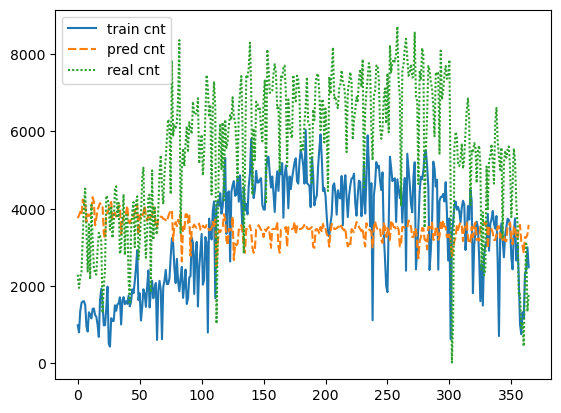

In [75]:
sns.lineplot(result_notohe)


In [76]:
# K = 5

In [77]:
knn5 = KNeighborsRegressor(n_neighbors=5) # K = 5

In [78]:
knn5.fit(X_train_full_scaled_notohe, y_train)

KNeighborsRegressor()

In [79]:
print(f"The R2 of the model is {knn5.score(X_test_full_notohe, y_test): .2f}")

The R2 of the model is -1.37


In [80]:
# K = 3

In [81]:
knn3 = KNeighborsRegressor(n_neighbors=3) # K = 3

In [82]:
knn3.fit(X_train_full_scaled_notohe, y_train)

KNeighborsRegressor(n_neighbors=3)

In [83]:
print(f"The R2 of the model is {knn3.score(X_test_full_notohe, y_test): .2f}")

The R2 of the model is -1.34


## with OHE

In [84]:
knn = KNeighborsRegressor(n_neighbors=10) # K = 10

In [85]:
knn.fit(X_train_full_scaled_ohe, y_train)

KNeighborsRegressor(n_neighbors=10)

In [86]:
print(f"The R2 of the model is {knn.score(X_test_full_scaled_ohe, y_test): .2f}")

The R2 of the model is -0.93


In [87]:
y_pred_ohe = knn.predict(X_test_full_scaled_ohe)

In [88]:
y_true_ohe = y_test.values

In [89]:
result_ohe = pd.DataFrame()
result_ohe['train cnt'] = y_train
result_ohe['pred cnt'] = y_pred_ohe[:365]
result_ohe['real cnt'] = y_true_ohe[:365]
result_ohe

train cnt  pred cnt  real cnt
0          985    1028.9      2294
1          801    3002.2      1951
2         1349    1476.3      2236
3         1562    1394.6      2368
4         1600    1536.1      3272
..         ...       ...       ...
360       1162    1879.5       441
361       2302    2561.3      2114
362       2423    2235.9      3095
363       2999    2060.9      1341
364       2485    1739.4      1796

[365 rows x 3 columns]

<Axes: >

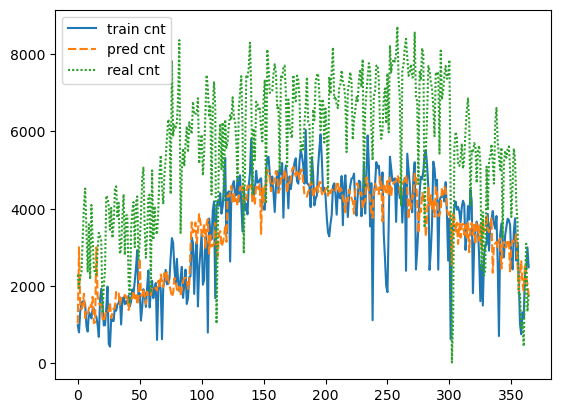

In [90]:
sns.lineplot(result_ohe)


In [91]:
# K = 5

In [92]:
knn5 = KNeighborsRegressor(n_neighbors=5) 

In [93]:
knn5.fit(X_train_full_scaled_ohe, y_train)

KNeighborsRegressor()

In [94]:
print(f"The R2 of the model is {knn5.score(X_test_full_scaled_ohe, y_test): .2f}")

The R2 of the model is -0.92


In [95]:
# K = 15

In [96]:
knn15 = KNeighborsRegressor(n_neighbors=15) 

In [97]:
knn15.fit(X_train_full_scaled_ohe, y_train)

KNeighborsRegressor(n_neighbors=15)

In [98]:
print(f"The R2 of the model is {knn15.score(X_test_full_scaled_ohe, y_test): .2f}")

The R2 of the model is -0.94


In [99]:
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(X_train_full_scaled_ohe, y_train)
    print(f"{k} KNN -> RMSE, {root_mean_squared_error(knn.predict(X_test_full_scaled_ohe), y_test): .2f}")

1 KNN -> RMSE,  2441.71
2 KNN -> RMSE,  2447.76
3 KNN -> RMSE,  2465.96
4 KNN -> RMSE,  2463.09
5 KNN -> RMSE,  2472.62
6 KNN -> RMSE,  2474.39
7 KNN -> RMSE,  2479.08
8 KNN -> RMSE,  2470.44
9 KNN -> RMSE,  2474.84


Text(0.5, 1.0, 'Scaled, OHE')

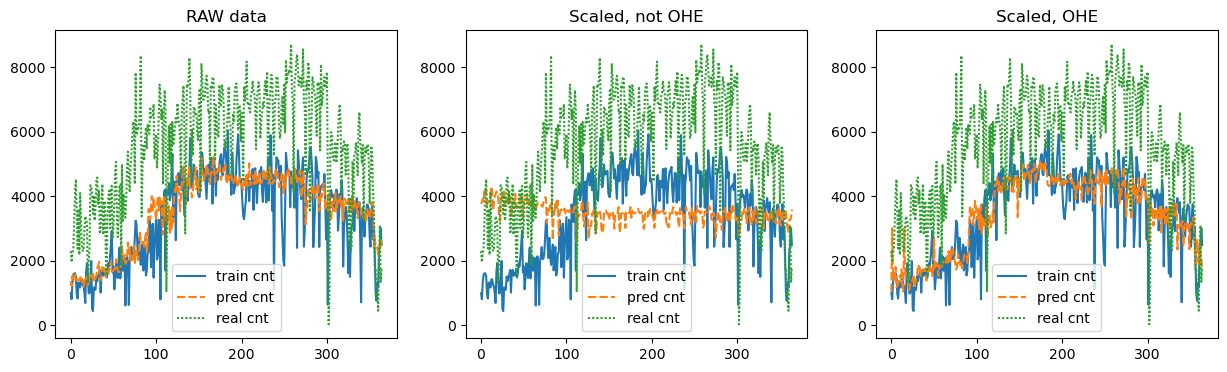

In [100]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))
sns.lineplot(result_raw, ax=ax1)
ax1.set_title('RAW data')
sns.lineplot(result_notohe, ax=ax2)
ax2.set_title('Scaled, not OHE')
sns.lineplot(result_ohe, ax=ax3)
ax3.set_title('Scaled, OHE')


In [101]:
# High correlation between predicted and real values 0.74
# this highlights good trend modeling
result_raw.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.822398  0.631753
pred cnt    0.822398  1.000000  0.741220
real cnt    0.631753  0.741220  1.000000

In [102]:
# No correlation between predicted and real values -0.15
result_notohe.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000 -0.425861  0.631753
pred cnt   -0.425861  1.000000 -0.152376
real cnt    0.631753 -0.152376  1.000000

In [103]:
# High correlation between predicted and real values 0.72
# this highlights good trend modeling
result_ohe.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.813651  0.631753
pred cnt    0.813651  1.000000  0.725997
real cnt    0.631753  0.725997  1.000000

# LinearRegression

In [104]:
from sklearn.linear_model import LinearRegression

## on raw (unscaled) data

In [105]:
lin_reg = LinearRegression()

In [106]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [107]:
print(f"The R2 of the model is {lin_reg.score(X_test, y_test): .2f}")

The R2 of the model is -0.70


In [108]:
y_true = y_test.values

In [109]:
y_pred_test = lin_reg.predict(X_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test, y_test): .2f}") # r2_score

MAE  2126.10
MSE  5412148.18
RMSE,  2326.40
R2 score, -0.70


In [110]:
result_raw = pd.DataFrame()
result_raw['train cnt'] = y_train
result_raw['pred cnt'] = y_pred[:365]
result_raw['real cnt'] = y_true[:365]
result_raw

train cnt  pred cnt  real cnt
0          985    1365.6      2294
1          801    1211.3      1951
2         1349    1519.0      2236
3         1562    1390.7      2368
4         1600    1511.6      3272
..         ...       ...       ...
360       1162    2193.9       441
361       2302    2402.8      2114
362       2423    2389.6      3095
363       2999    2639.8      1341
364       2485    2463.1      1796

[365 rows x 3 columns]

In [111]:
# High correlation between predicted and real values 0.82
# this highlights good trend modeling
result_raw.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.822398  0.631753
pred cnt    0.822398  1.000000  0.741220
real cnt    0.631753  0.741220  1.000000

<Axes: >

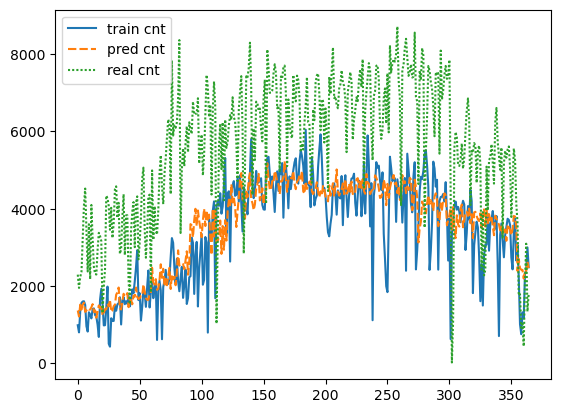

In [112]:
sns.lineplot(result_raw)

## without OHE

In [113]:
lin_reg = LinearRegression()

In [114]:
lin_reg.fit(X_train_full_scaled_notohe, y_train)

LinearRegression()

In [115]:
print(f"The R2 of the model is {lin_reg.score(X_test_full_notohe, y_test): .2f}")

The R2 of the model is -0.01


In [116]:
y_pred_notohe = lin_reg.predict(X_test_full_notohe)

In [117]:
y_pred_test = lin_reg.predict(X_test_full_notohe)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_full_notohe, y_test): .2f}") # r2_score

MAE  1516.43
MSE  3220743.66
RMSE,  1794.64
R2 score, -0.01


In [118]:
y_true_notohe = y_test.values

In [119]:
result_notohe = pd.DataFrame()
result_notohe['train cnt'] = y_train
result_notohe['pred cnt'] = y_pred_notohe[:365]
result_notohe['real cnt'] = y_true_notohe[:365]
result_notohe

train cnt     pred cnt  real cnt
0          985  3740.391438      2294
1          801  3657.243580      1951
2         1349  3646.867581      2236
3         1562  3381.031541      2368
4         1600  3878.743590      3272
..         ...          ...       ...
360       1162  3187.708286       441
361       2302  3564.585596      2114
362       2423  3650.857333      3095
363       2999  3681.415274      1341
364       2485  3685.361158      1796

[365 rows x 3 columns]

In [120]:
# Moderate correlation between predicted and real values 0.69
result_notohe.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.653514  0.631753
pred cnt    0.653514  1.000000  0.695512
real cnt    0.631753  0.695512  1.000000

<Axes: >

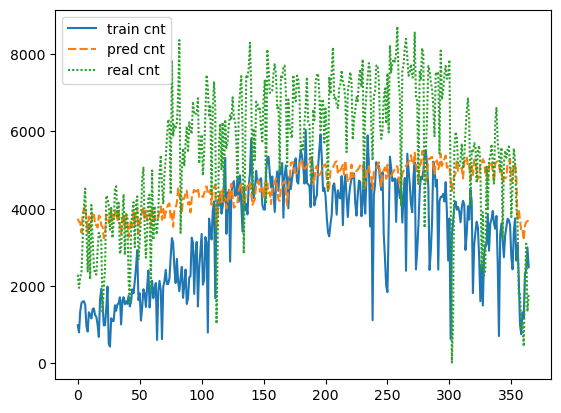

In [121]:
sns.lineplot(result_notohe)


## with OHE

In [122]:
lin_reg = LinearRegression()

In [123]:
lin_reg.fit(X_train_full_scaled_ohe, y_train)

LinearRegression()

In [124]:
print(f"The R2 of the model is {lin_reg.score(X_test_full_scaled_ohe, y_test): .2f}")

The R2 of the model is -0.66


In [125]:
y_pred_ohe = lin_reg.predict(X_test_full_scaled_ohe)

In [126]:
y_pred_test = lin_reg.predict(X_test_full_scaled_ohe)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {lin_reg.score(X_test_full_scaled_ohe, y_test): .2f}") # r2_score
print(f"Correlation, {lin_reg.score(X_test_full_scaled_ohe, y_test): .2f}") # r2_score

MAE  2122.05
MSE  5284228.61
RMSE,  2298.75
R2 score, -0.66
Correlation, -0.66


In [127]:
y_true_ohe = y_test.values

In [128]:
result_ohe = pd.DataFrame()
result_ohe['train cnt'] = y_train
result_ohe['pred cnt'] = y_pred_ohe[:365]
result_ohe['real cnt'] = y_true_ohe[:365]
result_ohe

train cnt     pred cnt  real cnt
0          985  1719.049850      2294
1          801  1257.019022      1951
2         1349  1159.632263      2236
3         1562  1089.283490      2368
4         1600  1815.004352      3272
..         ...          ...       ...
360       1162  -123.842680       441
361       2302  1365.590368      2114
362       2423  1905.714578      3095
363       2999  1751.374877      1341
364       2485  1806.087689      1796

[365 rows x 3 columns]

In [129]:
# High correlation between predicted and real values 0.83
# this highlights good trend modeling
result_ohe.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.799384  0.631753
pred cnt    0.799384  1.000000  0.833290
real cnt    0.631753  0.833290  1.000000

<Axes: >

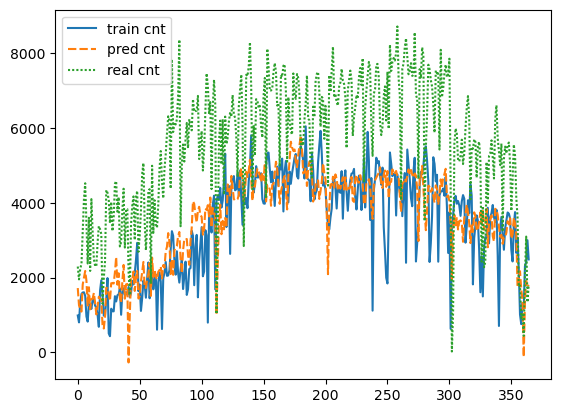

In [130]:
sns.lineplot(result_ohe)


Text(0.5, 1.0, 'Scaled, OHE')

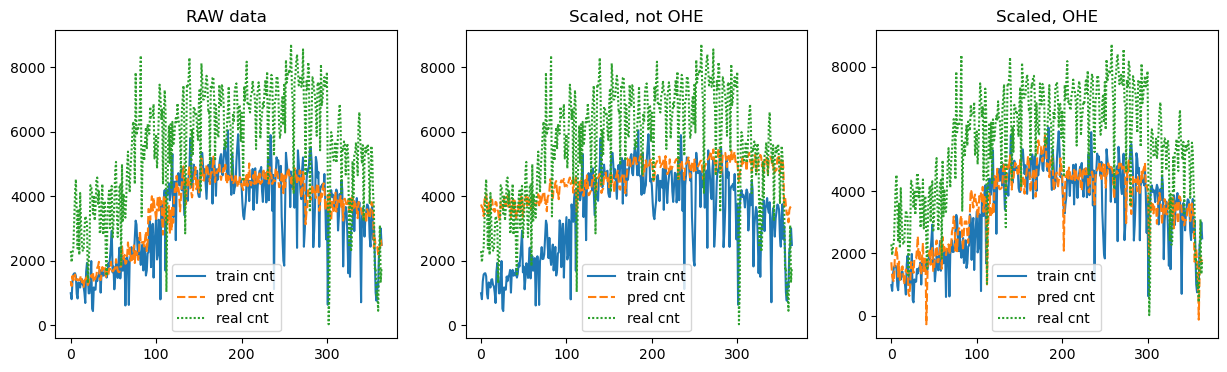

In [131]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))
sns.lineplot(result_raw, ax=ax1)
ax1.set_title('RAW data')
sns.lineplot(result_notohe, ax=ax2)
ax2.set_title('Scaled, not OHE')
sns.lineplot(result_ohe, ax=ax3)
ax3.set_title('Scaled, OHE')


# DecisionTreeRegressor

In [132]:
from sklearn.tree import DecisionTreeRegressor

## on raw (unscaled) data

In [133]:
tree = DecisionTreeRegressor(max_depth=10)

In [134]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [135]:
print(f"The R2 of the model is {tree.score(X_test, y_test): .2f}")

The R2 of the model is -0.62


In [136]:
y_true = y_test.values

In [137]:
y_pred_test = tree.predict(X_test)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {tree.score(X_test, y_test): .2f}") # r2_score

MAE  2088.83
MSE  5167695.62
RMSE,  2273.26
R2 score, -0.62


In [138]:
result_raw = pd.DataFrame()
result_raw['train cnt'] = y_train
result_raw['pred cnt'] = y_pred[:365]
result_raw['real cnt'] = y_true[:365]
result_raw

train cnt  pred cnt  real cnt
0          985    1365.6      2294
1          801    1211.3      1951
2         1349    1519.0      2236
3         1562    1390.7      2368
4         1600    1511.6      3272
..         ...       ...       ...
360       1162    2193.9       441
361       2302    2402.8      2114
362       2423    2389.6      3095
363       2999    2639.8      1341
364       2485    2463.1      1796

[365 rows x 3 columns]

In [139]:
# High correlation between predicted and real values 0.82
# this highlights good trend modeling
result_raw.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.822398  0.631753
pred cnt    0.822398  1.000000  0.741220
real cnt    0.631753  0.741220  1.000000

<Axes: >

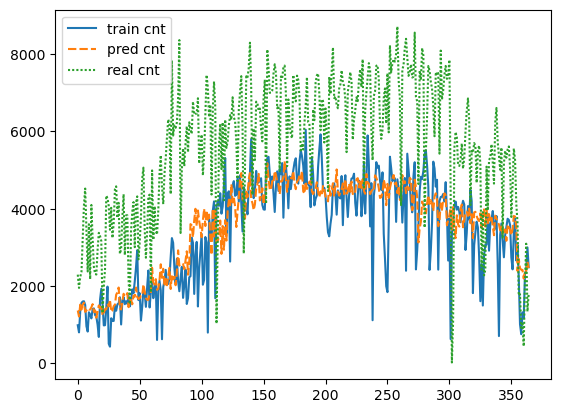

In [140]:
sns.lineplot(result_raw)

## without OHE

In [141]:
tree = DecisionTreeRegressor(max_depth=10)

In [142]:
tree.fit(X_train_full_scaled_notohe, y_train)

DecisionTreeRegressor(max_depth=10)

In [143]:
print(f"The R2 of the model is {tree.score(X_test_full_notohe, y_test): .2f}")

The R2 of the model is -1.93


In [144]:
y_pred_notohe = tree.predict(X_test_full_notohe)

In [145]:
y_pred_test = tree.predict(X_test_full_notohe)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {tree.score(X_test_full_notohe, y_test): .2f}") # r2_score

MAE  2714.40
MSE  9348462.38
RMSE,  3057.53
R2 score, -1.93


In [146]:
y_true_notohe = y_test.values

In [147]:
result_notohe = pd.DataFrame()
result_notohe['train cnt'] = y_train
result_notohe['pred cnt'] = y_pred_notohe[:365]
result_notohe['real cnt'] = y_true_notohe[:365]
result_notohe

train cnt  pred cnt  real cnt
0          985    3644.0      2294
1          801    3644.0      1951
2         1349    4511.0      2236
3         1562    1996.0      2368
4         1600    3644.0      3272
..         ...       ...       ...
360       1162    2594.0       441
361       2302    2594.0      2114
362       2423    1996.0      3095
363       2999    1996.0      1341
364       2485    3644.0      1796

[365 rows x 3 columns]

In [148]:
# Moderate correlation between predicted and real values 0.69
result_notohe.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.074575  0.631753
pred cnt    0.074575  1.000000  0.263831
real cnt    0.631753  0.263831  1.000000

<Axes: >

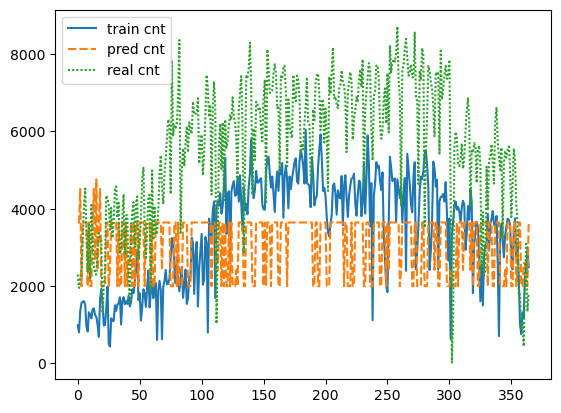

In [149]:
sns.lineplot(result_notohe)


## with OHE

In [150]:
tree = DecisionTreeRegressor(max_depth=10)

In [151]:
tree.fit(X_train_full_scaled_ohe, y_train)

DecisionTreeRegressor(max_depth=10)

In [152]:
print(f"The R2 of the model is {tree.score(X_test_full_scaled_ohe, y_test): .2f}")

The R2 of the model is -0.76


In [153]:
y_pred_ohe = tree.predict(X_test_full_scaled_ohe)

In [154]:
y_pred_test = tree.predict(X_test_full_scaled_ohe)

print(f"MAE {mean_absolute_error(y_pred_test, y_test): .2f}") # mean(abs(error)) = mean(abs(y_test - y_pred_test))
print(f"MSE {mean_squared_error(y_pred_test, y_test): .2f}") # mean(error**2) = mean((y_test - y_pred_test)**2)
print(f"RMSE, {root_mean_squared_error(y_pred_test, y_test): .2f}") # sqrt( mean( (y_test - y_pred_test)**2 ) ) # b0, b1, b2...
print(f"R2 score, {tree.score(X_test_full_scaled_ohe, y_test): .2f}") # r2_score
print(f"Correlation, {tree.score(X_test_full_scaled_ohe, y_test): .2f}") # r2_score

MAE  2162.08
MSE  5629401.93
RMSE,  2372.64
R2 score, -0.76
Correlation, -0.76


In [155]:
y_true_ohe = y_test.values

In [156]:
result_ohe = pd.DataFrame()
result_ohe['train cnt'] = y_train
result_ohe['pred cnt'] = y_pred_ohe[:365]
result_ohe['real cnt'] = y_true_ohe[:365]
result_ohe

train cnt     pred cnt  real cnt
0          985  1613.928571      2294
1          801  1212.000000      1951
2         1349  1391.000000      2236
3         1562  1162.000000      2368
4         1600  2034.766667      3272
..         ...          ...       ...
360       1162   623.000000       441
361       2302  2034.766667      2114
362       2423  2034.766667      3095
363       2999  1613.928571      1341
364       2485  2034.766667      1796

[365 rows x 3 columns]

In [157]:
# High correlation between predicted and real values 0.83
# this highlights good trend modeling
result_ohe.corr()

train cnt  pred cnt  real cnt
train cnt   1.000000  0.706353  0.631753
pred cnt    0.706353  1.000000  0.798514
real cnt    0.631753  0.798514  1.000000

<Axes: >

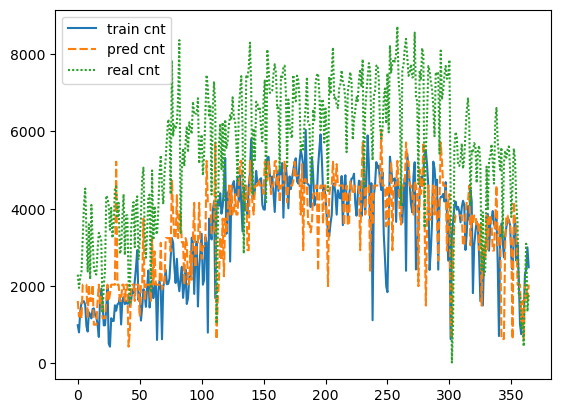

In [158]:
sns.lineplot(result_ohe)


Text(0.5, 1.0, 'Scaled, OHE')

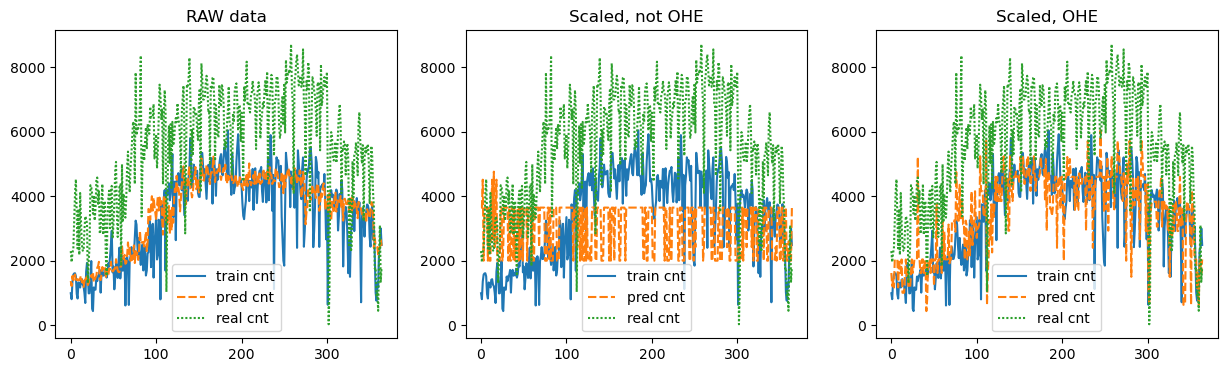

In [159]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,4))
sns.lineplot(result_raw, ax=ax1)
ax1.set_title('RAW data')
sns.lineplot(result_notohe, ax=ax2)
ax2.set_title('Scaled, not OHE')
sns.lineplot(result_ohe, ax=ax3)
ax3.set_title('Scaled, OHE')


# Bonus Exercise
Can few additional months improve the performance of the model?if we add for exemple 1year + one season, what happens? 

In [160]:
split_date_bonus = "2012-04-01"

In [161]:
X_train_bonus = features[day_clean["dteday"] < split_date_bonus]
X_test_bonus  = features[day_clean["dteday"] >= split_date_bonus]

y_train_bonus = target[day_clean["dteday"] < split_date_bonus]
y_test_bonus  = target[day_clean["dteday"] >= split_date_bonus]

In [162]:
categorical_cols = ["season", "mnth", "weekday", "weathersit"]

In [163]:
ohe = OneHotEncoder(sparse_output=False,drop="first")
ohe.fit(X_train_bonus[categorical_cols])

OneHotEncoder(drop='first', sparse_output=False)

In [164]:
X_train_cat_bonus = ohe.transform(X_train_bonus[categorical_cols])
X_test_cat_bonus  = ohe.transform(X_test_bonus[categorical_cols])

In [165]:
cat_feature_names_bonus = ohe.get_feature_names_out(categorical_cols)

X_train_bonus_cat_df = pd.DataFrame(X_train_cat_bonus,columns=cat_feature_names_bonus,index=X_train_bonus.index)
X_test_bonus_cat_df = pd.DataFrame(X_test_cat_bonus,columns=cat_feature_names_bonus,index=X_test_bonus.index)

In [166]:
numerical_cols = ["temp", "hum", "windspeed"]

In [167]:
X_train_num_bonus = X_train_bonus[numerical_cols]
X_test_num_bonus  = X_test_bonus[numerical_cols]

In [168]:
X_train_final_bonus = pd.concat([X_train_num_bonus, X_train_bonus_cat_df], axis=1)
X_test_final_bonus  = pd.concat([X_test_num_bonus, X_test_bonus_cat_df], axis=1)

In [169]:
scaler = StandardScaler()
scaler.fit(X_train_final_bonus)

X_train_scaled_bonus = scaler.transform(X_train_final_bonus)
X_test_scaled_bonus  = scaler.transform(X_test_final_bonus)

In [170]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_scaled_bonus, y_train_bonus)

KNeighborsRegressor(n_neighbors=10)

In [171]:
y_pred_bonus = knn.predict(X_test_scaled_bonus)

print("MAE:", mean_absolute_error(y_test_bonus, y_pred_bonus))
print("RMSE:", np.sqrt(mean_squared_error(y_test_bonus, y_pred_bonus)))
print("R2:", r2_score(y_test_bonus, y_pred_bonus))

MAE: 2212.6501818181814
RMSE: 2394.480388499578
R2: -1.2972951369788768


In [172]:
y_train_bonus.shape

(456,)

In [173]:
365-275

90

In [174]:
result_bonus = pd.DataFrame()
result_bonus['train cnt'] = y_train_bonus[90:90+275]
result_bonus['pred cnt'] = y_pred_bonus
result_bonus['real cnt'] = y_test_bonus.values
result_bonus

train cnt  pred cnt  real cnt
90        2227    2707.8      6041
91        2252    3786.2      5936
92        3249    3637.5      6772
93        3115    3625.6      6436
94        1795    3779.2      6457
..         ...       ...       ...
360       1162    2684.9      2114
361       2302    2410.1      3095
362       2423    2030.9      1341
363       2999    1952.0      1796
364       2485    2106.5      2729

[275 rows x 3 columns]

<Axes: >

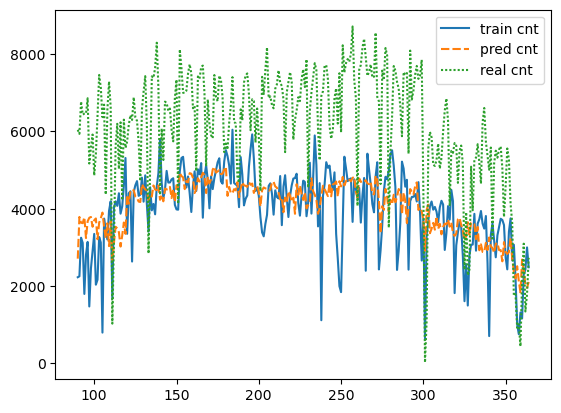

In [175]:
sns.lineplot(result_bonus)

# Notes & reflections 
## Model comparison and preprocessing

From the initial exploration of the dataset, it was already clear that the data did not fully behave like raw data. Most continuous variables were constrained to a (0,1) range, suggesting that some form of normalization had already been applied before the dataset was published.

Because of this initial appearance, the dataset gave the impression that it was already suitable for distance-based models. In particular, many categorical variables were encoded as integers with small ranges (e.g. season, month, weekday, weather situation), which made them easy to confuse with numerical features. This partially explains why it initially seemed that One-Hot Encoding was not strictly necessary.

At this stage, three different modeling approaches were tested — Linear Regression, Decision Tree, and KNN — using three preprocessing strategies:
raw data, scaled data without One-Hot Encoding, and scaled data with One-Hot Encoding.

## Raw data vs preprocessing choices

Across all three models, an interesting pattern emerged:
the performance obtained using the “raw” dataset was surprisingly similar to the performance obtained after applying scaling and One-Hot Encoding.

At first glance, this similarity could be interpreted as a sign that preprocessing choices do not significantly affect the models. However, a closer inspection reveals that this conclusion would be misleading.

The key reason lies in the fact that the dataset was already scaled before being downloaded. This means that even the so-called “raw” data already contains information derived from global statistics (such as minimum, maximum, or normalization factors) computed over the entire dataset, including observations from the future period (2012).

As a consequence, when a time-based split is performed (training on 2011 and testing on 2012), the training data indirectly benefits from preprocessing influenced by the test data. This introduces data leakage, as the model is exposed to information that would not be available in a real deployment scenario.

This explains why raw data models perform unexpectedly well across all three algorithms: the preprocessing has already been done “globally”, masking the true impact of proper scaling and encoding.

## What scaling actually does in this dataset

Scaling a dataset means computing global statistics (such as mean, standard deviation, or min–max ranges) and applying them to all observations. When scaling is performed before a train–test split, these statistics implicitly include information from the test period.

In this dataset, scaling was applied before download, meaning that all subsequent experiments start from data that already incorporates future information. As a result, even models trained only on 2011 data benefit from preprocessing influenced by 2012 observations.

# Which model performs best (despite corrupted data)?

Even acknowledging the data leakage issue, we can still compare relative behavior.

KNN (best overall fit)

1.Best at reproducing the shape of the demand curve

2.Learns recurring local patterns very well

3.Produces predictions closest to actual 2012 counts

Decision Tree

1.Captures non-linear relationships

2.Can match sharp changes in some periods


Linear Regression

1.Stable and interpretable

2.Captures average trends


## Even though all three models capture seasonality, KNN provides the closest approximation to real demand levels in 2012. Linear Regression is too rigid, while Decision Trees tend to overfit and generalize poorly across time.

# Metrics reminder (how to read results)

MAE (Mean Absolute Error)
→ Average error in number of bikes
→ Very business-friendly: “On average, we miss by ~X bikes per day”

RMSE (Root Mean Squared Error)
→ Penalizes large errors more than MAE
→ Useful when peaks and drops matter (high-demand days)

R² (R-squared):

R² = 1 → perfect model

R² = 0 → same as predicting the mean

R² < 0 → worse than predicting the average